In [2]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Percorso del file TensorBoard (modifica con il nome del tuo file)
file_path = 'events.out.tfevents.1697904954.7ccd0bc2b0a7.225.3'  # Sostituisci con il percorso corretto

# Caricamento del file TensorBoard
event_acc = EventAccumulator(file_path)
event_acc.Reload()

# Estrazione dei tag disponibili
tags = {
    "scalars": event_acc.Tags().get("scalars", []),
    "histograms": event_acc.Tags().get("histograms", []),
    "images": event_acc.Tags().get("images", []),
    "audio": event_acc.Tags().get("audio", []),
    "tensors": event_acc.Tags().get("tensors", []),
    "graphs": event_acc.Tags().get("graph", None),
}
# Estrarre i tag scalars disponibili
scalar_tags = event_acc.Tags().get("scalars", [])
print(f"Tag scalars trovati: {scalar_tags}")


Tag scalars trovati: ['charts/episodic_return', 'charts/episodic_length', 'charts/learning_rate', 'losses/value_loss', 'losses/policy_loss', 'losses/entropy', 'losses/old_approx_kl', 'losses/approx_kl', 'losses/clipfrac', 'losses/explained_variance', 'charts/SPS']


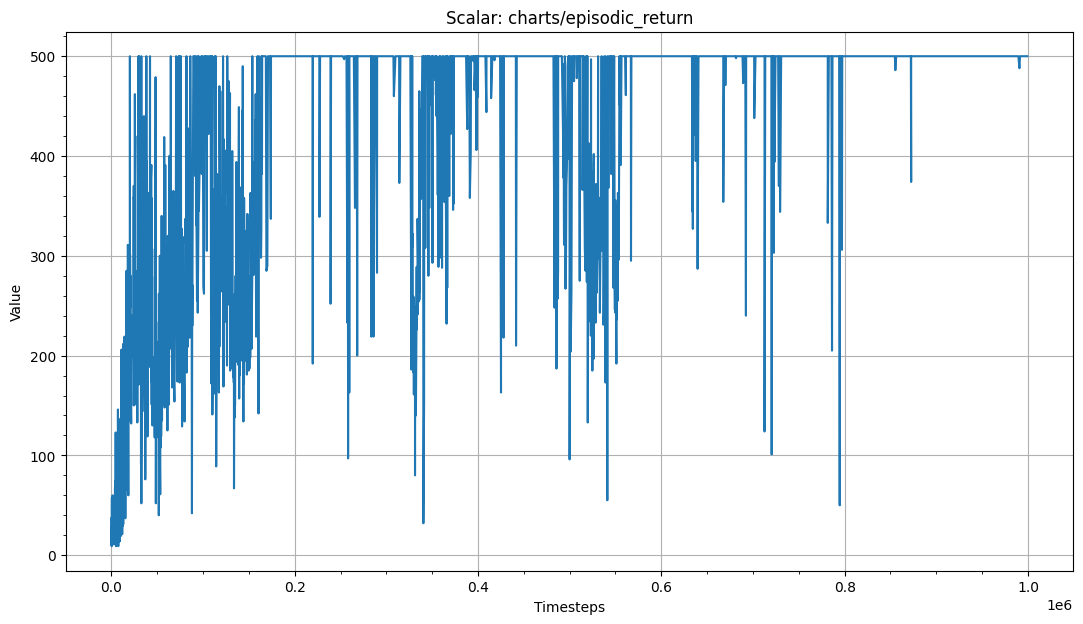

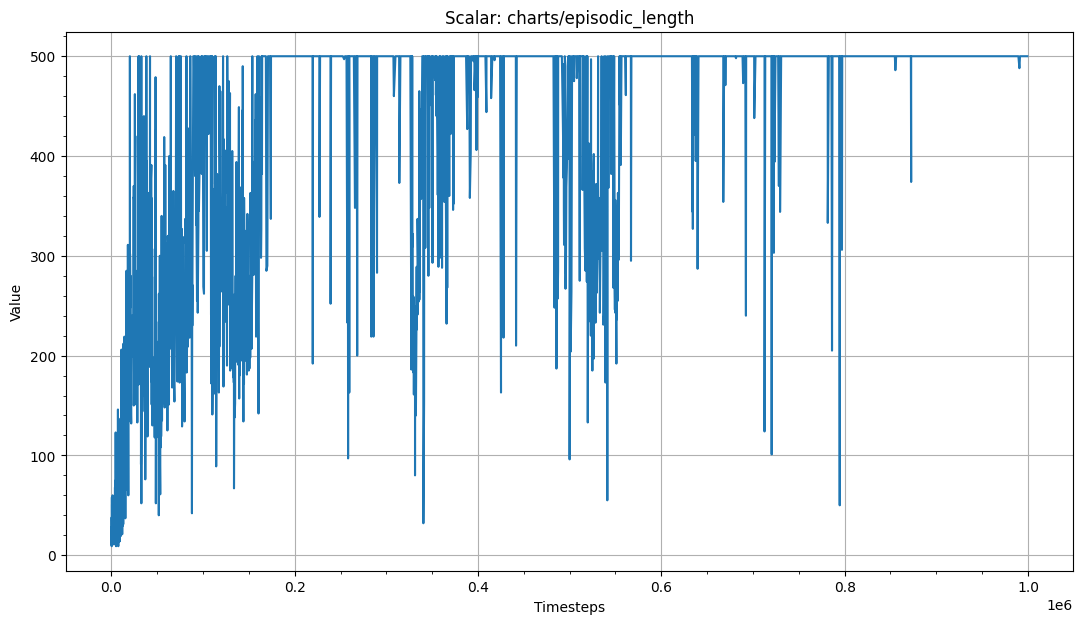

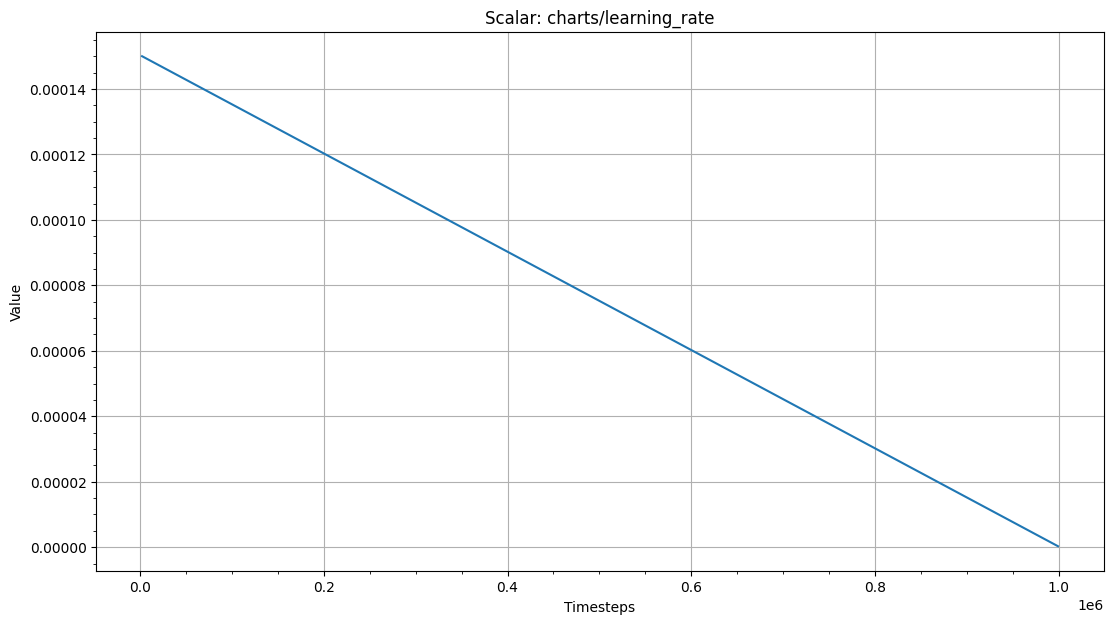

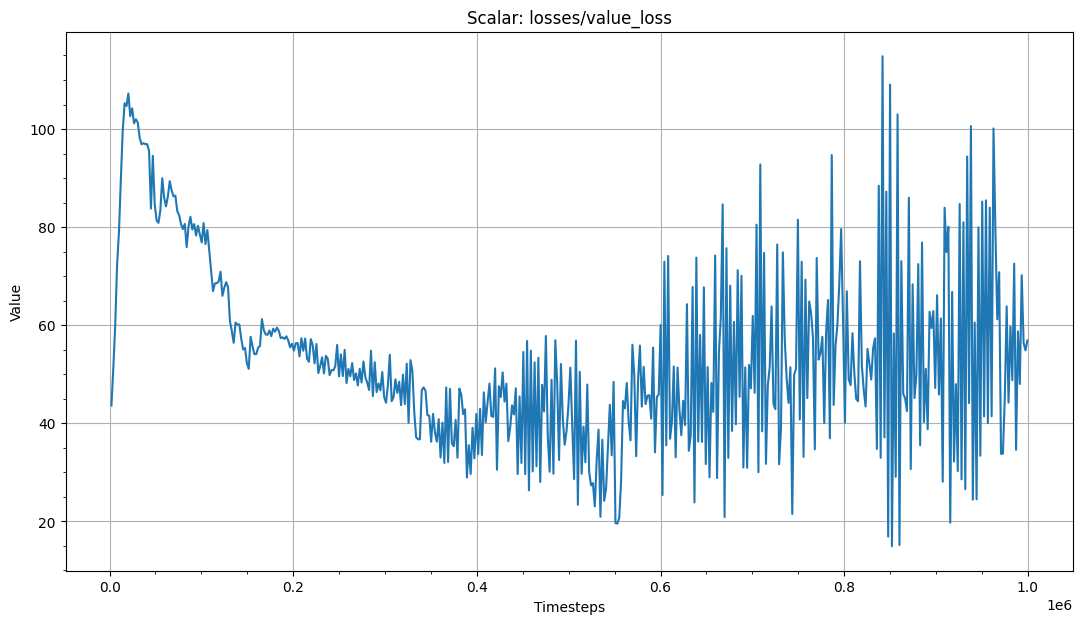

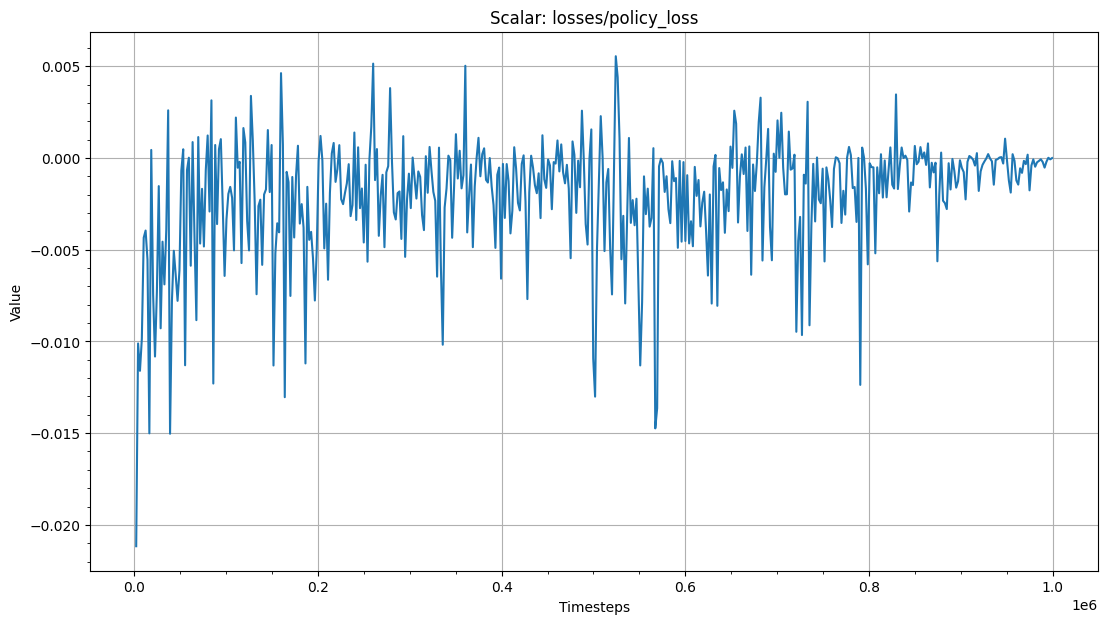

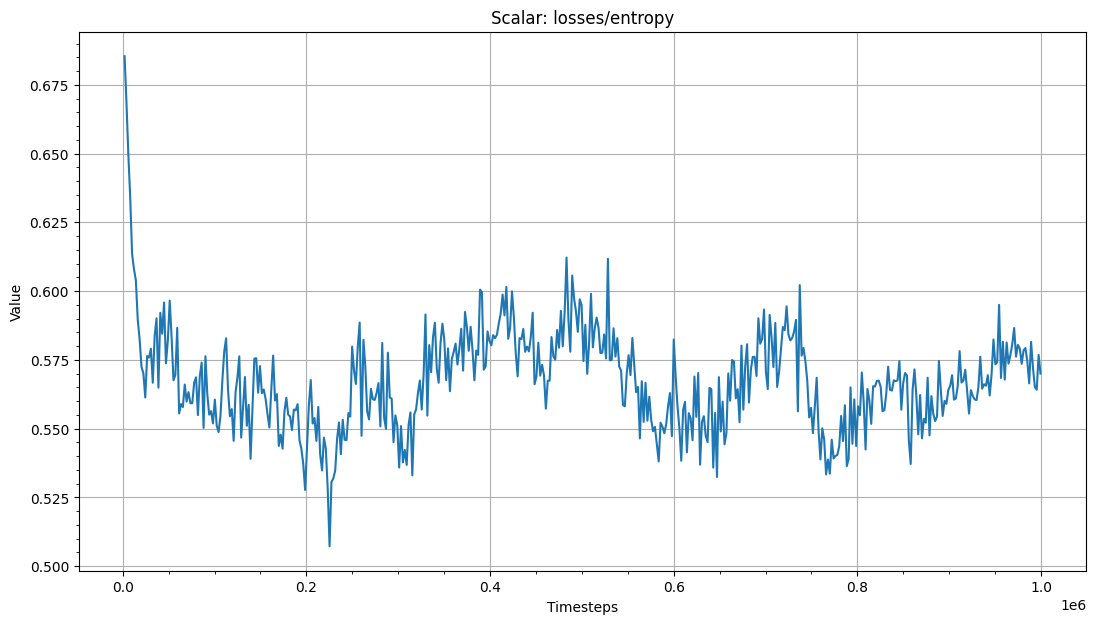

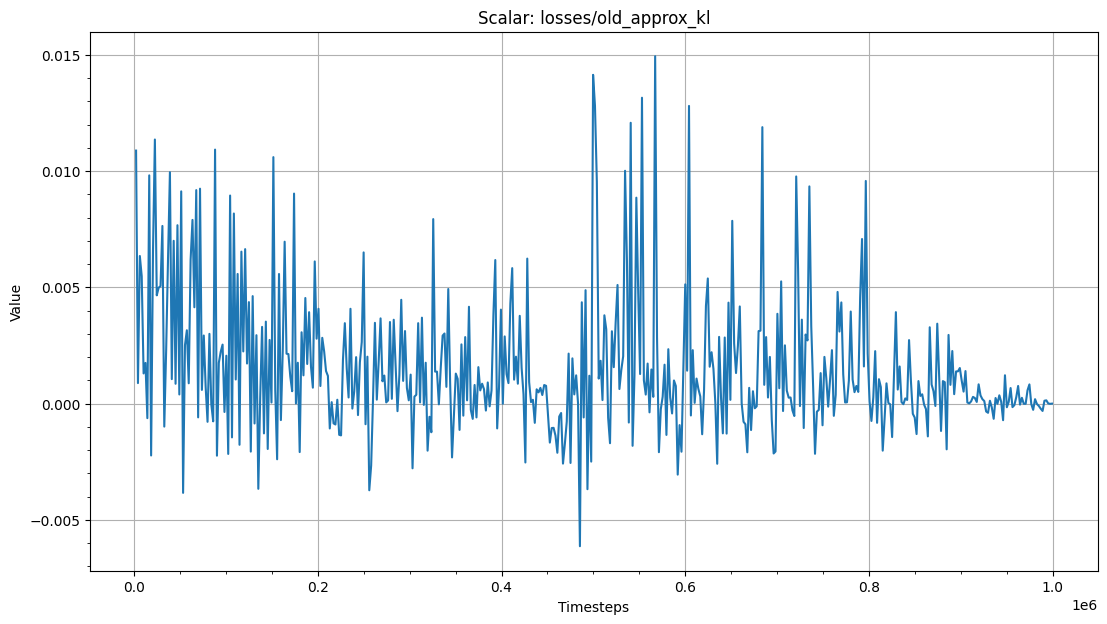

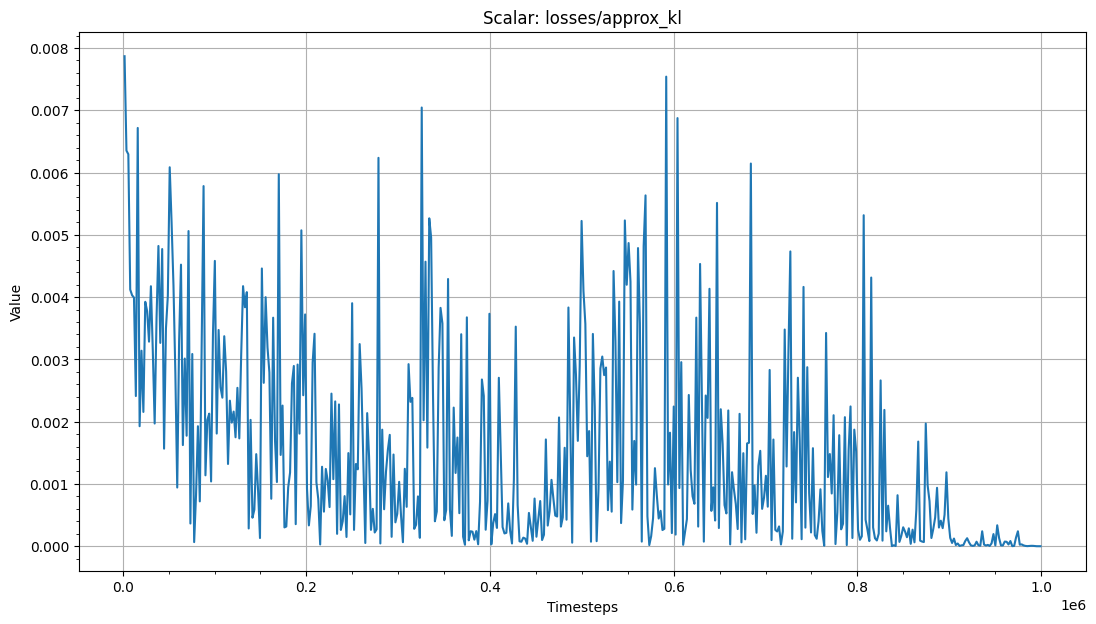

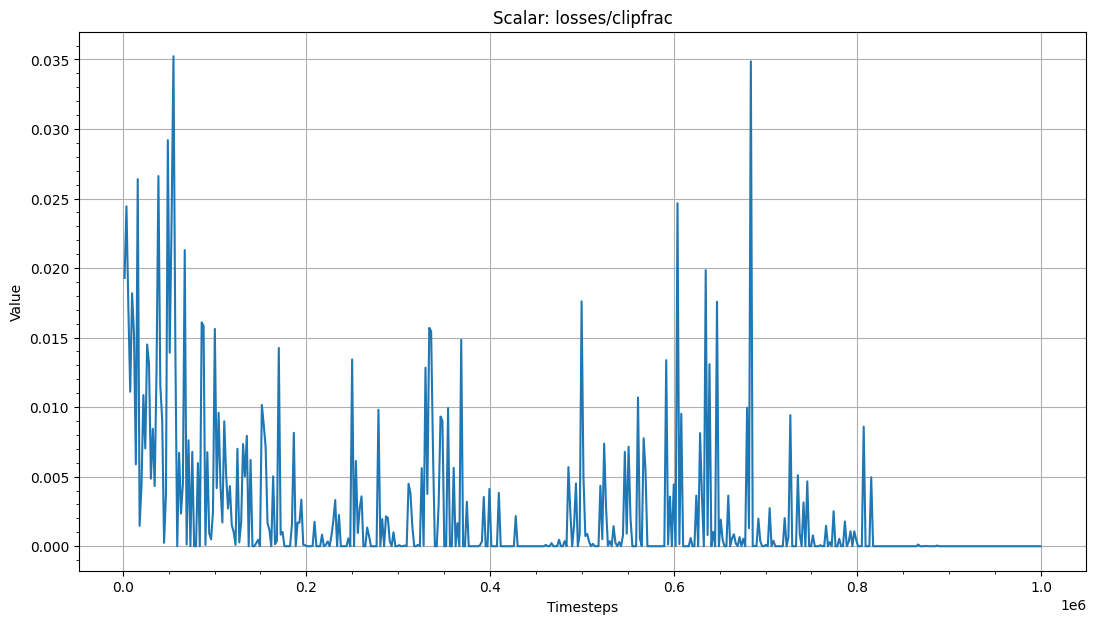

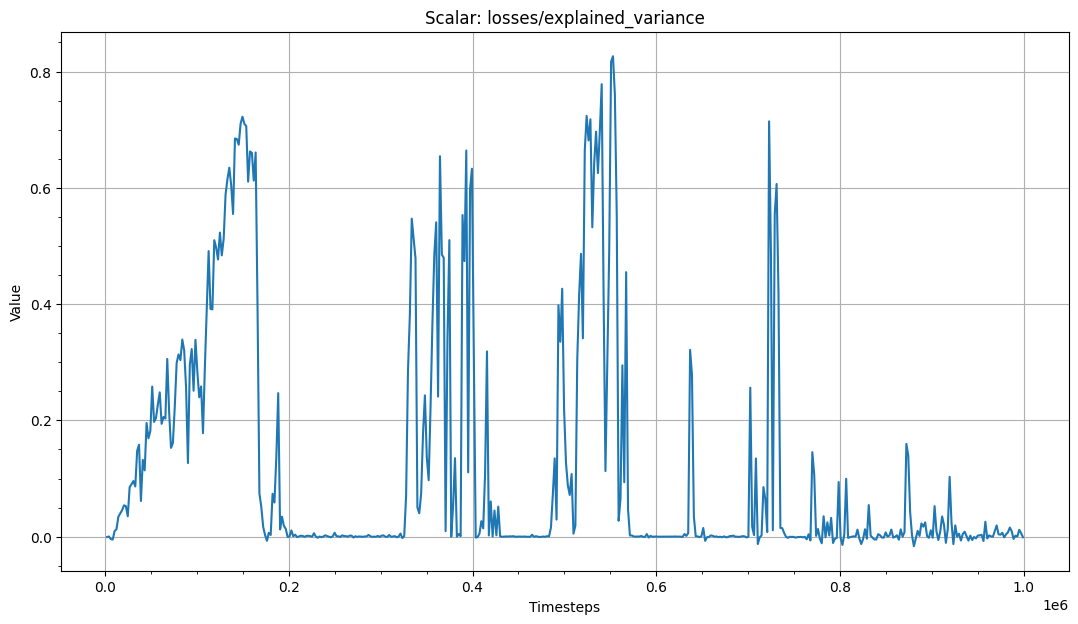

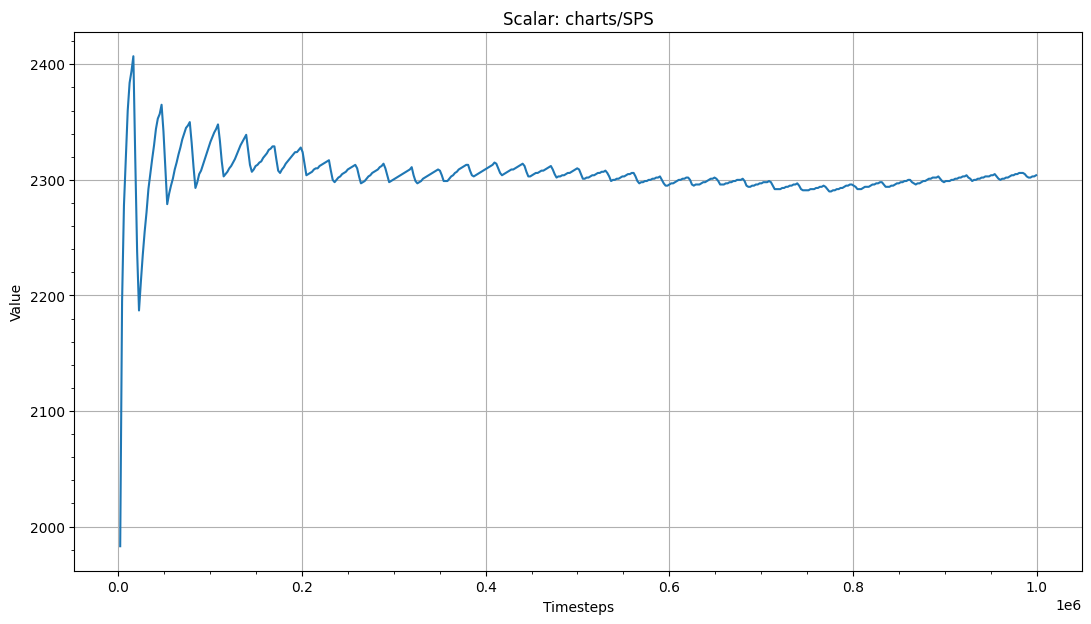

In [6]:
# Genera un grafico separato per ogni scalar
import matplotlib.pyplot as plt
for tag in scalar_tags:
    # Ottieni gli eventi per il tag corrente
    events = event_acc.Scalars(tag)
    steps = [e.step for e in events]
    values = [e.value for e in events]

    # Crea un plot
    plt.figure(figsize = (13,7))
    plt.plot(steps, values)
    plt.xlabel("Timesteps")
    plt.ylabel("Value")
    plt.title(f"Scalar: {tag}")
    plt.minorticks_on()
    plt.grid(True)

    # Salva o mostra il plot
    plt.savefig(f'{tag.replace("/", "_")}.png')  # Salva come immagine
    plt.show()
